<a href="https://colab.research.google.com/github/jiiiisoo/machinelearning/blob/main/supervised%20learning_regression_overfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **오버피팅**

선형 기저 함수 모델의 경우 문제는 M을 어떻게 정하느냐이다.M을 크게 하면 어떤 데이터에도 잘 피팅이 되는지 M=2,4,7,9 의 모델을 사용하여 비교해보겠다.

In [1]:
##앞에서 정의했던 필요한 데이터와 함수들 가져옴

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 나이에 따른 키의 인공 데이터 생성
np.random.seed(seed=1)
X_min=4 #X의 하한
X_max=30 #X의 상한
X_n=16 #데이터 개수
X=5+25*np.random.rand(X_n) #16명 나이 설정
Prm_c=[170, 108, 0.2] #생성 매개 변수
T=Prm_c[0]-Prm_c[1]*np.exp(-Prm_c[2]*X)+4*np.random.randn(X_n) #T:출력값
np.savez('ch5_data.npz', X=X, X_min=X_min, X_max=X_max, X_n=X_n, T=T)

#가우스 함수
def gauss(x,mu,s):
  return np.exp(-(x-mu)**2/(2*s**2))

##선형 기저 함수 모델
def gauss_func(w,x):
  m=len(w)-1 # w의 개수는 가우스함수 개수보다 하나 많기 때문
  mu=np.linspace(5,30,m)
  s=mu[1]-mu[0]
  y=np.zeros_like(x) #x와 같은 크기로 요소가 0의 행렬 y를 작성
  for j in range(m):
    y=y+w[j]*gauss(x,mu[j],s)
  y=y+w[m]
  return y

##선형 기저 함수 모델의 mse (평균 제곱 오차)
#피팅의 수준 산출
def mse_gauss_func(x,t,w):
  y=gauss_func(w,x)
  mse=np.mean((y-t)**2)
  return mse

##선형 기저 함수 모델의 해석해 (정확한 값)
def fit_gauss_func(x,t,m):
  mu=np.linspace(5,30,m)
  s=mu[1]-mu[0]
  n=x.shape[0]
  psi=np.ones((n,m+1)) #항상 1 출력하는 더미함수 (psi_(m+1)=1 만들기 위함)
  for j in range (m):
    psi[:,j]=gauss(x,mu[j],s)
  psi_T=np.transpose(psi)
  
  a=np.linalg.inv(psi_T.dot(psi))
  b=a.dot(psi_T)
  w=b.dot(t)
  return w

##가우스 기저 함수 표시
def show_gauss_func(w):
  xb=np.linspace(X_min,X_max,100)
  y=gauss_func(w,xb)
  plt.plot(xb,y,c=[.5,.5,.5], lw=4)

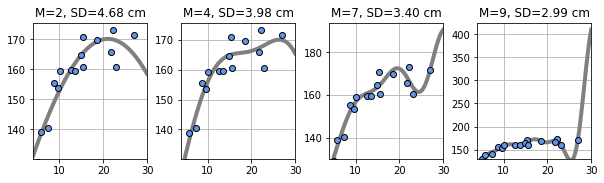

In [2]:
plt.figure(figsize=(10,2.5))
plt.subplots_adjust(wspace=0.3)

M=[2,4,7,9]
for i in range (len(M)):
  plt.subplot(1,len(M),i+1)
  W=fit_gauss_func(X,T,M[i])
  show_gauss_func(W)
  plt.plot(X,T, marker='o', linestyle='None', color='cornflowerblue', markeredgecolor='black')
  plt.xlim(X_min,X_max)
  plt.grid(True)
  plt.ylim(130.180)
  mse=mse_gauss_func(X,T,W)
  plt.title('M={0:d}, SD={1:.2f} cm'.format(M[i],np.sqrt(mse)))
  
plt.show()

M값이 커질 수록 SD 값은 줄어듦을 볼 수 있지만 M=7,9 일 때는 그래프가 20-30 부근에서 꺾인다. 이는 M이 증가할 수록 선형 기저 함수 모델은 작은 곡선도 표현 가능하므로 곡선이 데이터 점에 근접하게 되어 SD는 감소하지만 데이터가 없는 곳에서는 평균 제곱 오차와 관계가 없기 때문에 데이터 점이 있는 곳에서 억지로 데이터 점에 가까워 지려고 하여 데이터 점이 없는 곳에서는 뒤틀린다.

이러한 모델 행동을 over-fitting 이라고 한다.

이를 통해 최적의 M을 찾을 때 SD가 기준이 되지 않음을 알 수 있다. 따라서 새 데이터에 대한 예측의 데이터에 초점을 맞춰야한다.

예를 들어 데이터 X와 t의 4/1를 test data, 3/4를 training data로 나누어 w를 training data만을 사용하여 최적화시킨 뒤, 이를 통한 w를 사용하여 test data의 SD 또는 J를 계산하여 M의 평가 기준으로 활용한다. 즉, 훈련에 이용하지 않은 미지의 데이터에 대한 예측 오차로 M을 평가하는 것이다. 이를 holdout 검증이라고 한다.

어떤 비율로 test와 training data를 나눴는지도 결과에 영향을 주겠지만 일단 각각 1/4, 3/4로 한 후 M=2,4,7,9 로 피팅해본다.


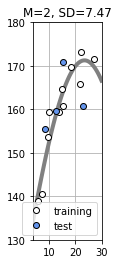

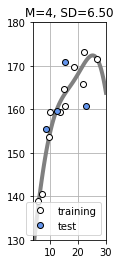

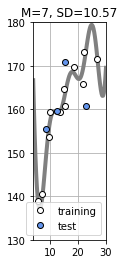

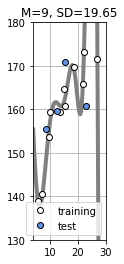

In [3]:
##training data & test data
X_test=X[:int(X_n/4+1)]
T_test=T[:int(X_n/4+1)]
X_train=X[int(X_n/4+1):]
T_train=T[int(X_n/4+1):]

##main
plt.subplots_adjust(wspace=0.3)
M=[2,4,7,9]
for i in range (len(M)):
  plt.subplot(1,len(M),i+1)
  W=fit_gauss_func(X_train,T_train,M[i])
  show_gauss_func(W)
  plt.plot(X_train,T_train,marker='o', linestyle='None', color='white', markeredgecolor='black', label='training')
  plt.plot(X_test,T_test,marker='o', linestyle='None', color='cornflowerblue', markeredgecolor='black', label='test')
  plt.legend(loc='lower right', fontsize=10, numpoints=1) #label 들어갈 위치와 폰트 사이즈
  plt.xlim(X_min,X_max)
  plt.ylim(130,180)
  plt.grid(True)
  mse=mse_gauss_func(X_test, T_test, W)
  plt.title('M={0:d}, SD={1:.2f}'.format(M[i], np.sqrt(mse)))
  plt.show()


SD의 값이 M=4일 때 가장 작고 그 뒤로는 증가함을 볼 수 있다. SD에 대해서만 M을 2부터 9까지 움직이며 그래프를 그려보면

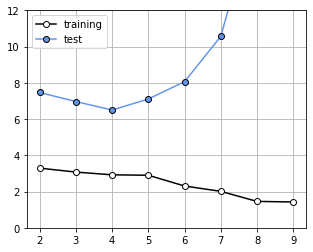

In [4]:
plt.figure(figsize=(5,4))
M=range(2,10)
mse_train=np.zeros(len(M))
mse_test=np.zeros(len(M))
for i in range (len(M)):
  W=fit_gauss_func(X_train,T_train,M[i])
  mse_train[i]=np.sqrt(mse_gauss_func(X_train,T_train,W))
  mse_test[i]=np.sqrt(mse_gauss_func(X_test,T_test,W))
plt.plot(M,mse_train, marker='o', linestyle='-', markerfacecolor='white', markeredgecolor='black', color='black', label='training')
plt.plot(M,mse_test, marker='o', linestyle='-', color='cornflowerblue', markeredgecolor='black', label='test')
plt.legend(loc='upper left', fontsize=10)
plt.ylim(0,12)
plt.grid(True)
plt.show()

M값이 증가할 수록 training data의 SD는 감소하고 test data의 SD는 M=4까지는 감소하다가 그 이후로는 증가함을 볼 수 있다.

하지만 이와 같이 data의 수가 작은 경우에는 test data와 training data를 어떻게 선택했느냐에 따라 M값에 따른 test data에 대한 SD의 차이가 크다.

따라서 이 차이를 최대한 줄이는 cross-validation (교차검증) 방법을 사용한다. 다양한 training과 test data의 분할에서 SD를 계산하고 평균을 계산하는 것이다. 데이터 분할하는 종류의 개수로 K-fold-cross-validation (K겹 교차검증) 으로 부르기도 한다.

데이터 X와 T를 K개로 분할하여 첫번째 데이터를 test data로 나머지를 training data로 설정하여 test data에서의 SD를 구하고 다음은 두번째 데이터를 test data로 나머지를 training data로 설정하여 test data에서의 SD를 구하고 이를 K번 반복하고 마지막에 K개의 SD의 평균을 계산하여 이 숫자를 M의 평가값으로 한다.

최대 분할 수는 K=N이고 이 때의 test data의 개수는 1이며 이를 LOOCV(leave-one-out-cross-validation) 라고 하고 data의 개수가 적을 때 사용된다.

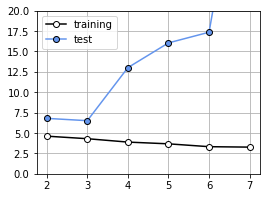

In [11]:
##K-fold-cross-validation

def Kfold_mse_gauss(x,t,m,k):
  n=x.shape[0] #n: x의 데이터 개수
  mse_train=np.zeros(k)
  mse_test=np.zeros(k)
  for i in range(0,k):
    x_train=x[np.fmod(range(n),k)!=i] #np.fmod(n,k): n을 k로 나눈 나머지 출력 / n을 range(n)으로 하면 0~n-1까지 각 수를 k로 나눈 나머지 출력됨
    t_train=t[np.fmod(range(n),k)!=i]
    x_test=x[np.fmod(range(n),k)==i]
    t_test=t[np.fmod(range(n),k)==i]
    wm=fit_gauss_func(x_train,t_train,m)
    mse_train[i]=mse_gauss_func(x_train,t_train,wm)
    mse_test[i]=mse_gauss_func(x_test,t_test,wm)
  return mse_train,mse_test

##main
M=range(2,8)
K=16 #K의 최대 (K=N이 최대이므로)
Cv_Gauss_train=np.zeros((K,len(M)))
Cv_Gauss_test=np.zeros((K,len(M)))
for i in range (0,len(M)):
  Cv_Gauss_train[:,i],Cv_Gauss_test[:,i]=Kfold_mse_gauss(X,T,M[i],K)
mean_Gauss_train=np.sqrt(np.mean(Cv_Gauss_train,axis=0)) #axis=0 무슨 의미??
mean_Gauss_test=np.sqrt(np.mean(Cv_Gauss_test,axis=0))
plt.figure(figsize=(4,3))
plt.plot(M,mean_Gauss_train, marker='o', linestyle='-', color='k', markerfacecolor='w', label='training')
plt.plot(M,mean_Gauss_test, marker='o', linestyle='-', color='cornflowerblue', markeredgecolor='black', label='test')
plt.legend(loc='upper left', fontsize=10)
plt.ylim(0,20)
plt.grid(True)
plt.show()



k-fold 검증을 통해 M=3일 때 test data의 오차가 가장 적음을 알 수 있다. Hold out 검증에서는 M=4일 때의 오차가 가장 작았지만 교차 검증에서가 더 신뢰도가 높다.

M=3에서가 오차가 가장 작음을 알았으니 이로 다시 w를 구하여 선형 기저 함수 모델을 구하면

SD=4.37 cm


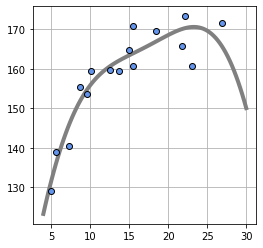

In [14]:
M=3
plt.figure(figsize=(4,4))
W=fit_gauss_func(X,T,M)
show_gauss_func(W)
plt.plot(X,T,marker='o', linestyle='None', color='cornflowerblue', markeredgecolor='black')
plt.xlim=([X_min,X_max])
plt.grid(True)
mse=mse_gauss_func(X,T,W)
print('SD={:.2f} cm'.format(np.sqrt(mse)))
plt.show()

K-fold 교차검증은 신뢰도가 높지만 시간이 많이 걸리므로 데이터의 수가 적을 때 유용하다. 데이터 수가 많으면 hold out 검증과 k-fold 교차 검증 결과가 비슷하므로 hold out 검증을 사용하는 것이 더 유용할 것이다.

출처: 파이썬으로 배우는 머신러닝의 교과서-이시카와아키히코